# Total Mass Constraint $\rho_t(\Omega)=2(t-1/2)^2+1/2$ between the same distribution
In this experiment, we consider the "transport" of the same distribution but with the total mass constraint. As a result, the distribution should shrink and come back. 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
sys.path.append('../../..')
from proximal.dynamicUOT import computeGeodesic
from proximal.grids import speed_and_growth
import ipywidgets as widgets
from ipywidgets import interact

# Set up

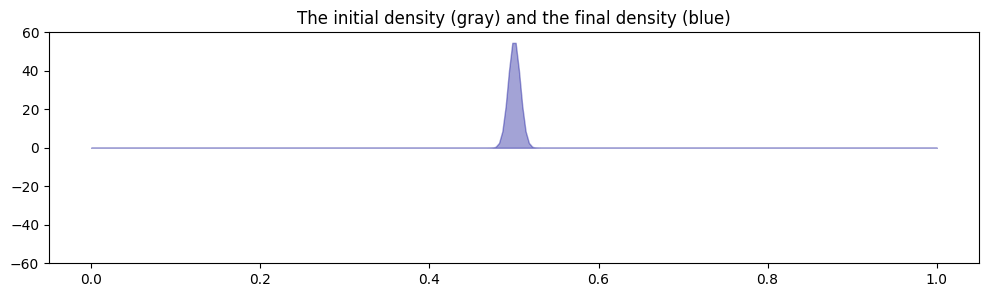

In [2]:
# Plotting initial and the final density

sigma = 0.01
K = 256
X = np.linspace(0, 1, K)  # Discretization of the time-space domain

def gauss(x, x_0, sigma, mass):
    # Gaussian bump
    normalized_factor = np.exp(-((x - x_0) ** 2) / sigma ** 2)
    return mass * (normalized_factor * K / np.sum(normalized_factor))

rho_0 = gauss(X, 0.5, sigma, 1) # Initial density
rho_1 = gauss(X, 0.5, sigma, 1)  # Final density

# Normalizing densities
rho_0 /= np.sum(rho_0) / 256 # make sure the total mass is 1
rho_1 /= np.sum(rho_1) / 256

rho_0.dtype = np.float64
rho_1.dtype = np.float64

# Plotting
plt.figure(figsize=(12, 3))
plt.ylim(-60, 60)
plt.title("The initial density (gray) and the final density (blue)")
plt.fill_between(X, rho_0, color="k", alpha=0.2)  # Use fill_between for similar effect to fill in Julia
plt.fill_between(X, rho_1, color="b", alpha=0.2)
plt.show()

# Geodesic Calculation

In [3]:
T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
H = np.ones((T,K))
time = np.array([(i+0.5)/T for i in range(0,T)])
F = 2*(time - 0.5)**2 + 0.5
x, lists = computeGeodesic(rho_0, rho_1, T, ll, H, F, p= 2.0, q=2.0, delta=0.5/np.pi, niter=3000)

Computing a geodesic for optimal transport with source and constraint...
Progress: 99%
Done.


# Plot of the geodesic

In [4]:
def plot_1D(t, x, v, g, X, rho_0, rho_1, ylim=[-2, 2], title=""):
    plt.figure(figsize=[16, 4])

    # Fill plots
    if rho_0 is not None:
        plt.fill_between(X, rho_0, color="k", alpha=0.2, label=r'$\rho_0$')
    if rho_1 is not None:
        plt.fill_between(X, rho_1, color="b", alpha=0.2, label=r'$\rho_1$')
    plt.fill_between(X, x.V.D[0][t, :], color="r", alpha=0.7, label=r'$\rho_{t}$')

    # Line plots
    plt.plot(X, v[0][t, :], "k", label=r'$v_t$')
    plt.plot(X, g[t, :], "g", label=r'$g_t$')
    plt.title(title)
    plt.axis([0, 1, ylim[0], ylim[1]])
    plt.show()

v,g = speed_and_growth(x.V)
plot_elements2 = [x.copy(), 10*v.copy(), 10*g.copy(), X.copy(), None, None, [-60,60], r"(red) $\rho_t$ (green) $10g_t$ (dark) $10v_t$"]
interact(lambda t: plot_1D(t, *plot_elements2), t=widgets.IntSlider(min=0, max=T-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t', max=14), Output()), _dom_classes=('widget-interact',…

<function __main__.<lambda>(t)>

# Plot of the violation from the continuity equation & convergence plot

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\i'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\i'
C:\Users\mao17\AppData\Local\Temp\ipykernel_14776\4094083512.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.title("$\sum_{t}|\int_{\Omega}H(t,x)d\\rho_t(x)-F(t)|$ at each iteration")
C:\Users\mao17\AppData\Local\Temp\ipykernel_14776\4094083512.py:21: SyntaxWarning: invalid escape sequence '\i'
  plt.title("$|\int_{\Omega}H(t,x)d\\rho_t(x)-F(t)|$ at each t for the final solution")
c:\Users\mao17\Workspace\pdot\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


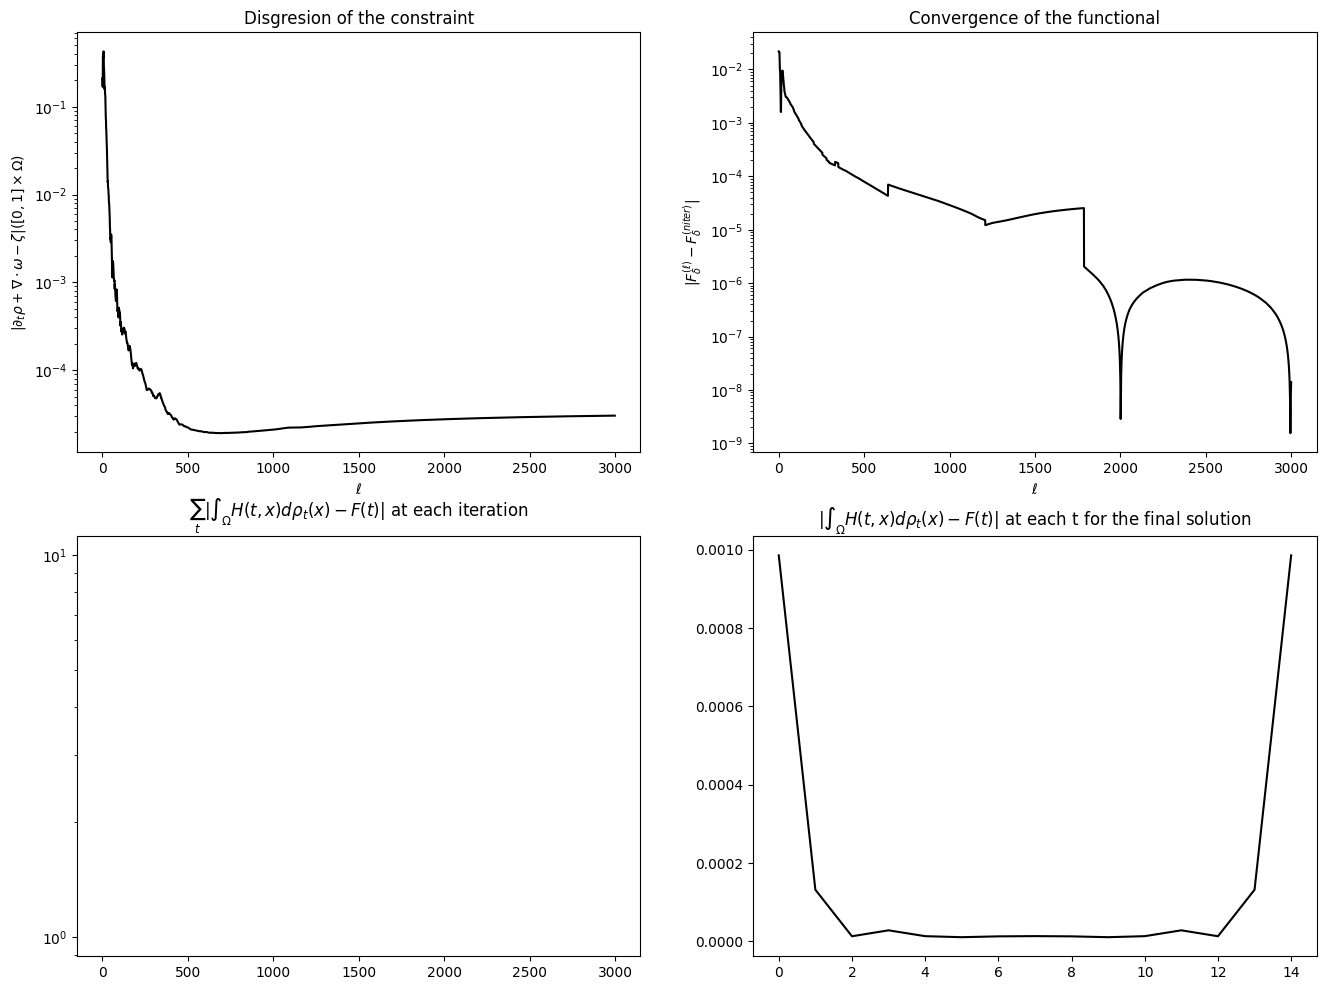

In [5]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.ylabel(r"$|\partial_t \rho + \nabla \cdot \omega - \zeta|([0,1]\times \Omega)$")
plt.xlabel(r"$\ell$")
plt.title("Disgresion of the constraint")
plt.semilogy(lists[1], "k")

plt.subplot(2, 2, 2)
plt.ylabel(r"$|F_{\delta}^{(\ell)}-F_{\delta}^{(niter)}|$")
plt.xlabel(r"$\ell$")
plt.title("Convergence of the functional")
minF = np.min(lists[0][-10:])
plt.semilogy(np.minimum(1, np.abs(lists[0] - np.mean(lists[0][-10:]))), "k")

plt.subplot(2, 2, 3)
plt.title("$\sum_{t}|\int_{\Omega}H(t,x)d\\rho_t(x)-F(t)|$ at each iteration")
plt.semilogy(lists[2], "k")

plt.subplot(2, 2, 4)
plt.title("$|\int_{\Omega}H(t,x)d\\rho_t(x)-F(t)|$ at each t for the final solution")
plt.plot(np.abs(np.sum(x.V.D[0]*H, axis=1)*1./256.-F), "k")

plt.show()

